In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('data.csv',on_bad_lines='skip',nrows=200000)

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  200000 non-null  object
 1   strength  200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
df.shape

(200000, 2)

In [7]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

password    0
strength    0
dtype: int64

In [10]:
df.shape

(200000, 2)

In [11]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of password strengths')

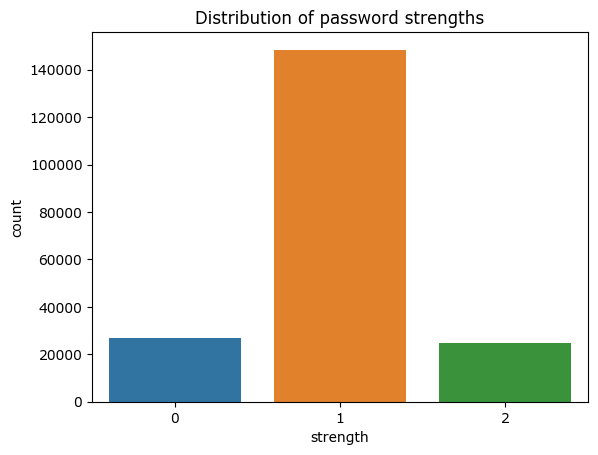

In [12]:
sns.countplot(x='strength',data=df)
plt.title('Distribution of password strengths')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [14]:
X=df['password']
y=df['strength']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)

In [19]:
model=XGBClassifier(
        learning_rate=0.1,      # Optimal Learning Rate
        n_estimators=100,       # Number of Trees
        max_depth=6,            # Optimal Max Depth
        random_state=42
    )

In [20]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [23]:
X_test=tfidf.transform(X_test)
y_pred=model.predict(X_test)

In [25]:
print(f"Classification Report:{classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix :{confusion_matrix(y_test, y_pred)}\n")
print(f"Accuracy :{accuracy_score(y_test, y_pred)}\n")
      

Classification Report:              precision    recall  f1-score   support

           0       0.19      0.00      0.00      8068
           1       0.74      1.00      0.85     44492
           2       0.93      0.01      0.01      7440

    accuracy                           0.74     60000
   macro avg       0.62      0.34      0.29     60000
weighted avg       0.69      0.74      0.63     60000


Confusion Matrix :[[    6  8061     1]
 [    8 44481     3]
 [   17  7373    50]]

Accuracy :0.7422833333333333

